In [1]:
import utils

cifar10_dir = "./data/cifar-10-batches"
X_train, y_train, X_test, y_test = utils.load_cifar10(cifar10_dir)
print("训练数据形状", X_train.shape)
print("训练标签形状:", y_train.shape)
print("测试数据形状:", X_test.shape)
print("测试标签形状:", y_test.shape)

训练数据形状 (50000, 3072)
训练标签形状: (50000,)
测试数据形状: (10000, 3072)
测试标签形状: (10000,)


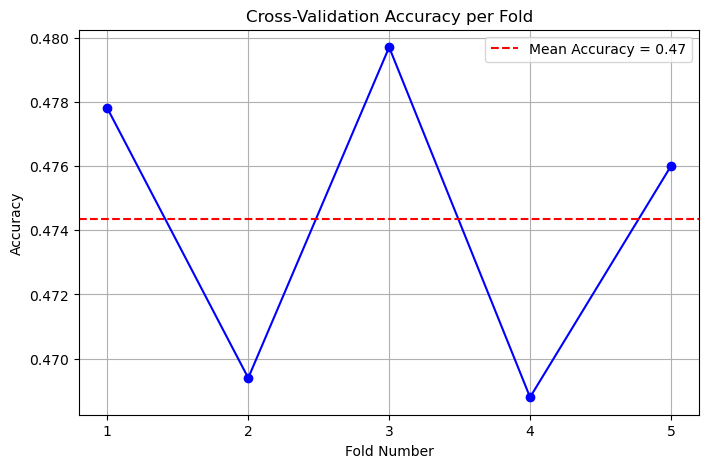

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def random_forest_train(X_train, y_train):
    """训练随机森林, 返回拟合后的PCA和随机森林"""
    pca = PCA(n_components=32)
    X_train_reduced = pca.fit_transform(X_train)

    # 交叉验证拟合随机森林
    random_forest = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, oob_score=True)
    scores = cross_val_score(random_forest, X_train_reduced, y_train, cv=5, scoring='accuracy')
    
    # 交叉验证正确率可视化
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
    plt.axhline(y=np.mean(scores), color='r', linestyle='--', label=f"Mean Accuracy = {np.mean(scores):.2f}")
    plt.title("Cross-Validation Accuracy per Fold")
    plt.xlabel("Fold Number")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, len(scores) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # 在整个数据集上拟合随机森林
    random_forest.fit(X_train_reduced, y_train)

    return random_forest, pca

random_forest, pca = random_forest_train(X_train, y_train)

In [3]:
def random_forest_test(X_test, y_test, random_forest, pca):
    X_test = pca.transform(X_test)
    y_pred = random_forest.predict(X_test) 
    utils.get_test_scores(y_test, y_pred)
    return y_pred

y_pred = random_forest_test(X_test, y_test, random_forest, pca)

在测试集上的准确率(Accuracy): 48.49%
在测试集上的精确率(Precision): 48.00%
在测试集上的召回率(Recall): 48.49%


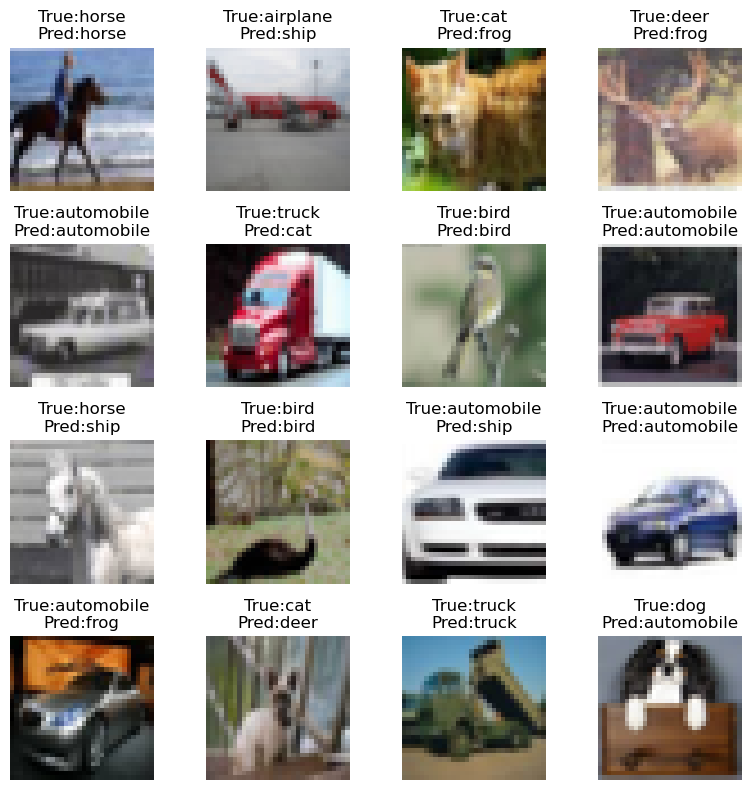

In [4]:
utils.show_predict_res(X_test, y_test, y_pred)

分类报告:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1000
           1       0.54      0.59      0.57      1000
           2       0.41      0.33      0.37      1000
           3       0.35      0.31      0.33      1000
           4       0.43      0.39      0.41      1000
           5       0.44      0.40      0.42      1000
           6       0.46      0.57      0.51      1000
           7       0.53      0.48      0.51      1000
           8       0.55      0.65      0.60      1000
           9       0.49      0.54      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



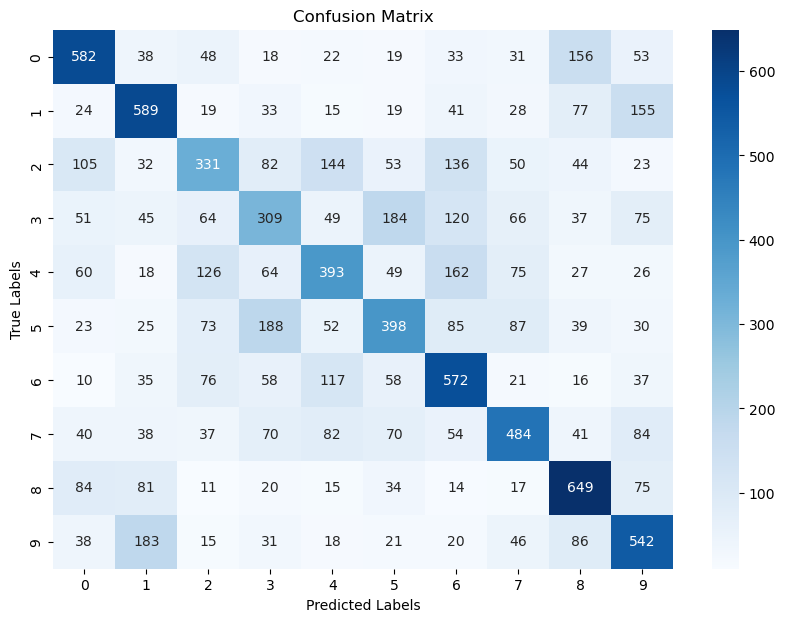

In [5]:
utils.get_report_and_cm(y_test, y_pred)